# Matemática Computacional II
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Introdução e conceitos fundamentais

A solução de sistema de equações algébricas lineares é provavelmente o processo numérico mais utilizado para simular situações do mundo real. É uma etapa fundamental na resolução de vários problemas que envolvam, por exemplo, equações diferenciais parciais, otimização, regressão linear e não linear e sistemas de equações não lineares. Geralmente, a solução do sistema linear é a fase que demanda a maior parte do tempo de processamento para resolver o problema. Portanto, é de extrema importância que se tenha uma implementação eficiente do método. Serão abordados os principais métodos diretos e alguns métodos iterativos usados na solução de sistemas.

Considere um sistema  de equações lineares

$$\left\{ \begin{array}{l}
a_{11}x_1 +a_{12}x_2 + \cdots + a_{1n}x_n = b_1\\
	         a_{21}x_1 +a_{22}x_2 + \cdots + a_{2n}x_n = b_2\\
	         \vdots   \\
	         a_{n1}x_1 +a_{n2}x_2 + \cdots + a_{nn}x_n = b_1\\
	         \end{array} \right.$$

O qual pode ser escrito em notação compacta, na seguinte forma

$$  \sum_{j=1}^{n} a_{ij} x_j = b_i$$

com $i=1,2,...,n$. Ou, ainda, na forma de equação matricial

$$Ax=b$$

em que $A= (a_{ij})$ com $i,j=1,..,n$, é a matriz dos coeficientes,
$x=(x_1,x_2,...,x_n)^t$ é o vetor de incógintas e $b=(b_1, b_2,...,b_n)^t$ é o vetor de termos independentes de  $x$. Então, tem-se

$$\left[\begin{array}{cccc}
	         a_{11} & a_{12} & \cdots & a_{1n} \\
	         a_{21} & a_{22} & \cdots & a_{2n} \\
	         \vdots & \vdots & \vdots & \vdots \\
	         a_{n1} & a_{n2} & \cdots & a_{nn} \\
	         \end{array} \right]
\left[\begin{array}{c}
	         x_1 \\
	         x_2 \\
             \vdots\\
	         x_n \\
	         \end{array} \right]
=
\left[\begin{array}{c}
	         b_1 \\
	         b_2 \\
             \vdots\\
	         b_n \\
	         \end{array} \right]
	         $$



Resolver o sistema dado, consiste em encontrar o vetor solução $\overline x=(\overline x_1, \overline x_2,..., \overline x_n)^t$ que satisfaça todas as equações simultaneamente.

Graficamente em $R^2$, a solução de um sistema linear representa a intersecção das retas definidas pelas equações.



**Exemplo 1**

O sistema linear

$$\left\{ \begin{array}{l}
-x_1 + 2x_2 = 3 \\
              x_1 + x_2 = 3
	         \end{array} \right.$$
             
tem uma única solução $\overline x= (1,2)^t$, como pode ser visto no gráfico abaixo.

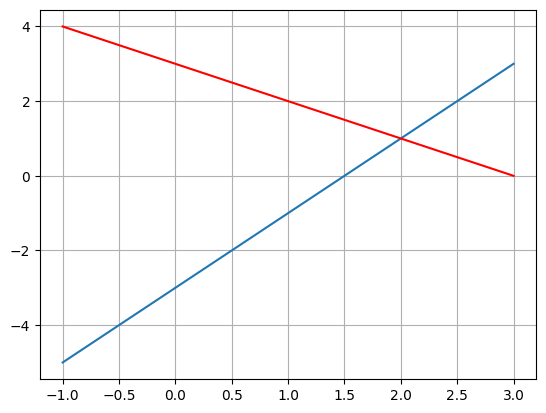

In [ ]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
eq1 = lambda x: -3+2*x
eq2 = lambda x: 3-x
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota
plt.plot(xi, eq1(xi), "-", xi, eq2(xi), "r-")
plt.grid()
plt.show()

Já o sistema linear

$$\left\{ \begin{array}{l}
x_1 + x_2 = 1\\
             2x_1 + 2x_2 = 2
	         \end{array} \right.$$
             
tem infinitas soluções já que as duas equações representam a retas coincidentes.

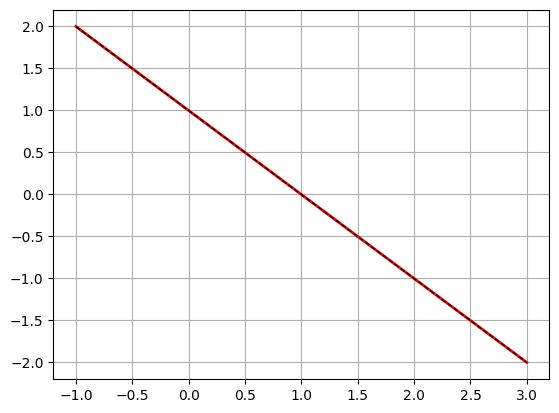

In [ ]:
eq1 = lambda x: 1-x
eq2 = lambda x: (2-2*x)/2
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota
plt.plot(xi, eq1(xi), "r-", linewidth= 2.0)
plt.plot( xi, eq2(xi), "k--", linewidth=1.0)
plt.grid()
plt.show()

Por fim, o sistema linear

$$\left\{ \begin{array}{l}
	         x_1 + x_2 = 1\\
             2x_1 + 2x_2 = 4
	         \end{array} \right.$$

             
Não tem nenhuma solução (sistema inconsistente) já que as duas equações representam a retas paralelas.

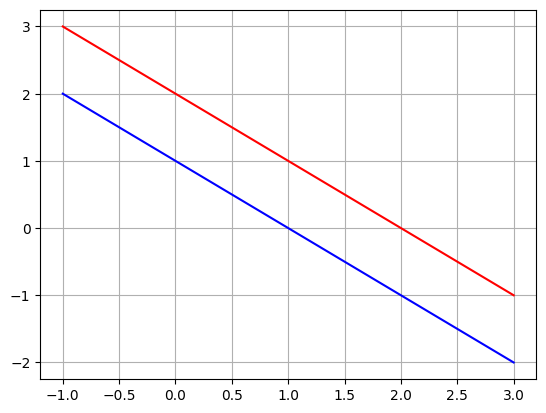

In [ ]:
eq1 = lambda x: 1-x
eq2 = lambda x: (4-2*x)/2
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota
plt.plot(xi, eq1(xi), "b-",  xi, eq2(xi), "r-")
plt.grid()
plt.show()

## Condicionamento de matrizes

Sabemos que um sistema linear $n \times n$, $Ax=b$ tem solução única se $det(A) \neq 0$, caso $det(A)=0$ dizemos que a matriz $A$ é singular e o sistema poderá ter infinitas soluções ou nenhuma solução. Mas o que acontece se a matriz é "quase singular" ($det(A)$ é muito pequeno)?

Dizemos que $det(A)=|A|$ é muito pequeno se $|A|<<||A||$ onde $||A||$ é a **norma** da matriz $A$. 

A norma é um número real usado para expressar a magnitude de um vetor ou de uma matriz.

### Norma de matrizes

Normas de matrizes podem ser definidas forma semelhante. 
Seja $A = (a_{ij})_{n \times n}$ uma matriz qualquer.  Chamamos de **norma Euclidiana** ao valor dado por

$$ \|A\|_e = \sqrt{\sum^n_{i=1} \sum^n_{j=1} a_{ij}^2}$$

e **norma linha** ou **norma infinito** ao valor dado por
$$\|A\|_{\infty} = \max_{1 \leq i \leq n} \sum_{j=1}^n \left|a_{ij} \right| $$


### Número de condicionamento de uma matriz
Uma medida formal para o condicionamento de uma matriz, o **número de condicionamento da matriz** definido como

$$cond(A) = \|A\| \|A^{-1}\| $$

se esse número estiver próximo de 1, então a matriz é bem condicionada. Esse número aumenta com o mal condicionamento da matriz.

Infelizmente, o número de condicionamento é computacionalmente oneroso para matrizes grandes. Então, muitas vezes é suficiente estimar o condicionamento comparando o determinante com a magnitude dos elementos da matriz.

Se as equações estiverem mal condicionadas, pequenas mudanças nos coeficientes da matriz resultarão em grandes mudanças na solução.

**Exemplo 2**

Consideremos o sistema linear

$$\left\{ \begin{array}{l}
	         2x_1 + x_2 = 3\\
             2x_1 + 1.001x_2 = 0
	         \end{array} \right.$$

Cuja solução é dada por:

In [ ]:
import scipy.linalg as la

A = np.array([[2, 1], [2, 1.001]])
b = np.array([3, 0])
print ('x =', la.solve(A,b))

x = [ 1501.5 -3000. ]


A matriz dos coeficientes desse sistema tem um número de condicionamento grande, ou seja, a matriz é mal condicionada


In [ ]:
print (la.norm(A) * la.norm(la.inv(A)))

5001.000500000551


E o determinante é bem pequeno, se comparado a norma:

In [ ]:
la.det(A)

0.0019999999999997797

Observe o que acontece com a solução do sistema quando variamos ligeiramente um dos coeficientes, isto é, quando resolvemos:

$$\left\{ \begin{array}{l}
	         2x_1 + x_2 = 3\\
             2x_1 + 1.002x_2 = 0
	         \end{array} \right.$$

In [ ]:
A = [[2, 1], [2, 1.002]]
print ('x =',la.solve(A,b))

x = [  751.5 -1500. ]


Uma mudança no coeficiente na ordem de 1% gerou uma diferença na solução de 100%!

## Sistemas triangulares

Sistemas lineares triangulares são aqueles cuja matriz dos coeficientes é uma matriz triangular. Em geral o algoritmo para resolução de sistemas triangulares é bastante simples e basea-se em substituições subsequentes.

**Sistema triangular inferior**

Um sistema triangular inferior $Ax=b$ com coeficientes $(a_{ij})=0$ para $i<j$ e $a_{ij} \neq 0$, $i=0,1,...,n$ é representado por

$$ \begin{cases}
	         a_{11}x_1 = b_1\\
	         a_{21}x_1 + a_{22}x_2 = b_2\\
	         a_{31}x_1 + a_{32}x_2 + a_{33}x_3= b_3\\
	         \vdots \\
	         a_{n1}x_1 + a_{n2}x_2 + a_{33}x_3 + \cdots + a_{nn}x_n= b_n\\
	         \end{cases} $$
             
pode ser resolvido usando o seguinte algoritmo:

$$ x_1 = b_1/a_{11}$$

para $i=2,3...,n$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=1}^{(i-1)} a_{ij}x_j}{a_{ii}}$$	         
	         
Usando Python, um código que implementa esse algoritmo, é mostrado no exemplo abaixo.


**Exemplo 3**

Seja o sistema linear

$$\left\{ \begin{array}{l}
	         2x_1 = 2\\
             x_1 + 4x_2 = -3\\
             x_1 + x_2 + x_3 = 0
	         \end{array} \right.$$

um código em Python que implementa esse algoritmo e a solução obtida executando o programa são mostrados a seguir

In [ ]:
A = [[2,0,0], [1,4,0], [1,1,1]]
b = [2,-3,0]
x1 = b[0]/A[0][0]
x = [x1]

for i in range(1,len(A)):
    soma = 0
    for j in range(0,i):
        soma +=  A[i][j]*x[j]
    x.append((b[i]-soma)/A[i][i])
print (x)

[1.0, -1.0, 0.0]


Usando o módulo numérico Numpy podemos escrever esse mesmo algoritmo usando operações vetoriais, como o produto interno _dot_, por exemplo

In [ ]:
import numpy as np
A = np.array([[2,0,0], [1,4,0], [1,1,1]] )
b = np.array([2,-3,0])

n = len(b)
for i in range(n):
    b[i] = (b[i] - np.dot(A[i,0:i],b[0:i]))/A[i][i]
print (b)

[ 1 -1  0]


Já um sistema triangular superior $Ax=b$ com coeficientes $(a_{ij})=0$ para $i>j$ e $a_{ij} \neq 0$, $i=0,1,...,n$ é representado por

$$ \begin{cases}
	         a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + \cdots + a_{2n}x_n = b_1\\
	         a_{22}x_2 + a_{23}x_3 + \cdots + a_{2n}x_n = b_2\\
	         a_{33}x_3 + \cdots + a_{3n}x_n = b_3\\
	         \vdots \\
	         a_{nn}x_n= b_n\\
	         \end{cases} $$
             
pode ser resolvido usando o seguinte algoritmo:

$$ x_n = b_n/a_{nn}$$

para $i=(n-1), (n-2),...,1$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=i+1}^{(n)} a_{ij}x_j}{a_{ii}}$$

Usando Python, um código que implementa esse algoritmo, é mostrado abaixo.

**Exemplo 4**

Seja o sistema linear

$$\left\{ \begin{array}{l}
	         3x_1 + x_2 +x_3= 4\\
             2x_2 -x_3 = 2\\
             3x_3 = 3
	         \end{array} \right.$$

um código em Python que implementa esse algoritmo e a solução obtida executando o programa são mostrados a seguir

In [ ]:
A = [[3,1,1], [0,2,-1], [0,0,3]]
b = [4,2,3]

n = len(A)-1       #os indices correm de 0 ate n-1
xn = b[n]/A[n][n]

x = [0]*len(A)     # cria um vetor de zeros
x[-1] = xn         # atribui xn na ultima posicao de x

for i in range(n-1,-1,-1):
    soma = 0
    for j in range(i+1,n+1):
        soma +=  A[i][j]*x[j]
    xi = (b[i]-soma)/A[i][i]
    x[i] = xi

print(x)

[0.5, 1.5, 1.0]


## Método da Eliminação de Gauss

Os métodos diretos de eliminação consistem no processo
de transformar um sistema de equações lineares $Ax=b$, em que $A= (a_{ij})$ com  $i,j=1,..,n$,
$x=(x_1,x_2,...,x_n)^t$ e $b=(b_1, b_2,...,b_n)^t$, em um sistema equivalente,
aplicando operações elementares sobre as linhas da matriz $(A,b)$.

O sistema equivalente obtido ao final do processo, deve ser de
resolução mais simples ou imediata, por substituição direta. No caso da eliminação de Gauss
com pivoteamento diagonal ou pivoteamento parcial, obtém-se um sistema equivalente
na forma triangular. No caso da eliminação de Gauss-Jordan o sistema equivalente
obtido possui a matriz de coeficientes igual a matriz identidade.   


Em geral, consideraremos neste texto, um sistema linear escrito na forma geral como  

$$ \begin{cases}
	         a_{11}x_1 +a_{12}x_2 + \cdots + a_{1n}x_n = b_1\\
	         a_{21}x_1 +a_{22}x_2 + \cdots + a_{2n}x_n = b_2\\
	         \vdots   \\
	         a_{n1}x_1 +a_{n2}x_2 + \cdots + a_{nn}x_n = b_1\\
	         \end{cases} $$
             
cuja forma forma matricial $Ax=b$ tem a seguinte representação
            
$$\left[\begin{array}{cccc}
	         a_{11} & a_{12} & \cdots & a_{1n} \\
	         a_{21} & a_{22} & \cdots & a_{2n} \\
	         \vdots & \vdots & \vdots & \vdots \\
	         a_{n1} & a_{n2} & \cdots & a_{nn} \\
	         \end{array} \right]
\left[\begin{array}{c}
	         x_1 \\
	         x_2 \\
             \vdots\\
	         x_n \\
	         \end{array} \right]
=
\left[\begin{array}{c}
	         b_1 \\
	         b_2 \\
             \vdots\\
	         b_n \\
	         \end{array} \right]
	         $$
	         
e a matriz aumentada $(A,b)$ é dada por  

$$\left[\begin{array}{cccccc}
	         a_{11} & a_{12} & \cdots & a_{1n} & | & b_1\\
	         a_{21} & a_{22} & \cdots & a_{2n} & | & b_2\\
	         \vdots & \vdots & \vdots & \vdots & | & \vdots\\
	         a_{n1} & a_{n2} & \cdots & a_{nn} & | & b_n\\
	         \end{array} \right]$$


O processo de **eliminação de Gauss** com pivoteamento diagonal consiste em transformar
o sistema em um sistema equivalente triangular superior por meio de operações
elementares sobre as linhas da matriz $(A,b)$ tomando, em cada passo, como pivô,
os elementos da diadonal de $A$, desde que não seja nulo. Caso o algum elemento da
diagonal seja nulo podemos permutar duas linhas da matriz a fim obter um pivô
diferente de zero.

Para cada passo $k$ do processo, anulamos os termos abaixo do
elemento da diagonal $a_{kk}$, subtraindo cada linha $i=k+1$ da matriz $(A,b)$,
pela linha linha anterior, $i=k$, multiplicada pelo fator $m_{ik}=\frac{a_{ik}}{a_{kk}}$.

Assim, no 1º passo ($k=1$), fazemos $m_{i1}=\frac{a_{i1}}{a_{11}}$, $i=2,...,n$
e cada linha de $(A,b)$, a partir da 2ª, será subtraída da 1ª linha multiplicada por
$m_{k1}$ obtendo-se a matriz $(A^{(1)},b^{(1)})$ tal que


$$(A^{(1)},b^{(1)}) = \left[\begin{array}{ccccccc}
	         a^{(1)}_{11} & a^{(1)}_{12} & a^{(1)}_{13} & \cdots & a^{(1)}_{1n} & | & b^{(1)}_1\\
	         0            & a^{(2)}_{22} & a^{(2)}_{23} & \cdots & a^{(2)}_{2n} & | & b^{(2)}_2\\
	         0            & a^{(2)}_{32} & a^{(2)}_{33} & \cdots & a^{(2)}_{3n} & | & b^{(2)}_3\\
	         \vdots       & \vdots       & \vdots       & \vdots & \vdots       & | & \vdots   \\
	         0            & a^{(2)}_{n2} & a^{(2)}_{n3} & \cdots & a^{(2)}_{nn} & | & b^{(2)}_n\\
	         \end{array} \right]$$
             

No 2º passo ($k=2$), fazemos $m_{i2}=\frac{a_{i2}}{a_{k2}}$, $i=3,...,n$
e cada linha de $(A^{(1)},b^{(1)})$, a partir da 3ª, será subtraída da 2ª linha multiplicada por
$m_{k2}$ obtendo-se a matriz $(A^{(2)},b^{(2)})$ tal que

$$(A^{(2)},b^{(2)}) = \left[\begin{array}{ccccccc}
	         a^{(1)}_{11} & a^{(1)}_{12} & a^{(1)}_{13} & \cdots & a^{(1)}_{1n} & | & b^{(1)}_1\\
	         0            & a^{(2)}_{22}            & a^{(2)}_{23} & \cdots & a^{(2)}_{2n} & | & b^{(2)}_2\\
	         0            & 0            & a^{(3)}_{33} & \cdots & a^{(3)}_{3n} & | & b^{(3)}_3\\
	         \vdots       & \vdots       & \vdots       & \vdots & \vdots       & | & \vdots   \\
	         0            & 0            & a^{(3)}_{n3} & \cdots & a^{(3)}_{nn} & | & b^{(3)}_n\\
	         \end{array} \right]$$

Segundo os passos seguintes, até o passo $n-1$, obtemos ou sistema triangular superior na forma   

$$           \begin{cases}
	         a^{(1)}_{11}x_1 + a^{(1)}_{12}x_2 + a^{(1)}_{13}x_2 + \cdots + a^{(1)}_{1n}x_n = b^{(1)}_1\\
             \hspace{65px}     a^{(2)}_{22}x_2 + a^{(2)}_{23}x_2 + \cdots + a^{(2)}_{2n}x_n = b^{(2)}_2\\
             \hspace{65px}     \hspace{65px}     a^{(3)}_{33}x_2 + \cdots + a^{(3)}_{3n}x_n = b^{(3)}_3\\
 	         \hspace{65px}     \hspace{65px}      \hspace{65px}     \hspace{45px}      \vdots   \\
	         \hspace{65px}     \hspace{65px}      \hspace{65px}     \hspace{45px}  a^{(n)}_{nn}x_n = b^{(n)}_n\\
	         \end{cases} $$

O qual pode ser resolvido por substituição retroativa.



**Atividade 1:**

Desenvolva uma função em python para encontrar a solução de um sistema linear qualquer de ordem $n$. 

Utilize o código desenvolvido para encontrar a solução dos seguintes sistemas:

a) $\begin{cases} 
	         2x_1 + 3x_2 + x_3 +5x_4= 11\\ 
	         x_1  + 3.5x_2  + x_3 +7.5x_4= 13\\
	         1.4x_1 + 2.7x_2 + 5.5x_3 + 12x_4 = 21.6\\
	         -2x_1 + 1x_2 + 3x_3 +28x_4 = 30
	         \end{cases}$
    
b) $\begin{cases} 
	         6.1x_1 + 0.32x_2 + 1.3x_3 +2.1x_4 + 0.11x_5 = 19.52\\ 
	         0.82x_1  + 8.81x_2  + 1.01x_3 +3x_4 + 3.12x_5= 15.83\\
	         0.5x_1 + 1.78x_2 + 15.2x_3 + 4.2x_4 +8.1x_5= -22.14\\
	         4.2x_1 + 5.3x_2 + 1.8x_3 +20.9x_4 +7.51x_5 = 27.28\\
	         0.2x_1 + 9.1x_2 + 4.68x_3 +4.3x_4 +20.1x_5  = -21.78
	         \end{cases}$
             
c)$ \begin{cases} 
    12.1756 x_1 + 4.0231 x_2 - 2.1732 x_3 + 5.1967 x_4 = 17.1020\\ 
   -4.0231 x_1 + 6.0030 x_2              + 1.1973 x_4 = -6.1593\\
   -1.0000 x_1 - 5.2107 x_2 + 11.1111 x_3              =  3.0004\\
	6.0235 x_1 + 7.0000 x_2 +            - 14.1561 x_4 =  0.0000
\end{cases} $